In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score,f1_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, mean_squared_error,plot_confusion_matrix

In [2]:
data = pd.read_csv("C:\\Users\\User\\Desktop\\datasets\\janetdata2.csv")

In [3]:
new=data.drop('ID',axis=1)

In [4]:
new.head()

,gender,marital,religion,ethnicity,family,age,education,occupation,salary,reference,property,relationshi,duration,history,status2
0,0,1,0,0,1,1,0,2,0,1,0,5,3,0,1
1,0,1,1,1,1,1,0,2,0,1,0,5,3,0,1
2,0,1,1,1,1,1,1,1,0,1,0,5,3,0,1
3,0,0,1,1,1,1,0,2,0,1,1,5,3,0,1
4,1,1,1,1,2,1,0,1,0,0,1,5,3,0,1


In [5]:
new.shape

(724, 15)

In [6]:
new.describe()


,gender,marital,religion,ethnicity,family,age,education,occupation,salary,reference,property,relationshi,duration,history,status2
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,0.332873,0.640884,0.200276,0.711326,0.577348,1.053867,0.885359,1.191989,0.392265,0.784530,0.715470,3.675414,2.506906,0.225138,0.733425
std,0.471567,0.480073,0.420696,0.471405,0.634059,0.686663,0.628380,0.742238,0.576867,0.766146,0.451502,2.231028,1.027267,0.417962,0.442474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000
max,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000,33.000000,3.000000,1.000000,1.000000


In [7]:
new.isnull().sum()

gender         0
marital        0
religion       0
ethnicity      0
family         0
age            0
education      0
occupation     0
salary         0
reference      0
property       0
relationshi    0
duration       0
history        0
status2        0
dtype: int64

In [8]:
pd.crosstab(index=new['status2'],columns='count')

col_0,count
status2,
0,193
1,531


In [9]:
X_data = new.iloc[:,0:14]
Y_data = new.iloc[:,14]

X_data

,gender,marital,religion,ethnicity,family,age,education,occupation,salary,reference,property,relationshi,duration,history
0,0,1,0,0,1,1,0,2,0,1,0,5,3,0
1,0,1,1,1,1,1,0,2,0,1,0,5,3,0
2,0,1,1,1,1,1,1,1,0,1,0,5,3,0
3,0,0,1,1,1,1,0,2,0,1,1,5,3,0
4,1,1,1,1,2,1,0,1,0,0,1,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,0,1,1,1,1,2,2,0,1,1,1,5,3,0
720,0,1,0,1,1,2,1,0,0,0,1,5,3,0
721,0,1,0,0,1,1,1,1,0,1,0,3,3,0
722,0,0,1,1,0,1,0,2,0,2,0,5,0,1


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X_data)
Y= np.array(Y_data).reshape(-1,1)
Y_scaled=scaler.fit_transform(Y)
Y_scaled


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from keras.utils import to_categorical
    

Using TensorFlow backend.


In [11]:
model=Sequential([
    Dense(16, input_shape=(14,), activation="relu"),
    Dense(8, activation="relu"),
    Dense(7, activation="relu")

])
model.add(Dense(units=1,activation='sigmoid',name='Output_Layer'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 63        
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 8         
Total params: 447
Trainable params: 447
Non-trainable params: 0
_________________________________________________________________


# Optimizers

In [13]:
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=True, clipvalue=1.0)
adam = keras.optimizers.Adam(lr=0.001)
rms= keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
adamax = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
nadam = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


In [14]:
model.compile(loss="binary_crossentropy",optimizer=nadam, metrics=['accuracy'])



Train on 506 samples, validate on 218 samples
Epoch 1/85
506/506 [==============================] - 0s 743us/step - loss: 0.8337 - accuracy: 0.2885 - val_loss: 0.7609 - val_accuracy: 0.2615
Epoch 2/85
506/506 [==============================] - 0s 176us/step - loss: 0.7153 - accuracy: 0.3953 - val_loss: 0.6915 - val_accuracy: 0.5275
Epoch 3/85
506/506 [==============================] - 0s 160us/step - loss: 0.6705 - accuracy: 0.7075 - val_loss: 0.6578 - val_accuracy: 0.7798
Epoch 4/85
506/506 [==============================] - 0s 186us/step - loss: 0.6392 - accuracy: 0.8261 - val_loss: 0.6137 - val_accuracy: 0.8945
Epoch 5/85
506/506 [==============================] - 0s 205us/step - loss: 0.6050 - accuracy: 0.8656 - val_loss: 0.5759 - val_accuracy: 0.9128
Epoch 6/85
506/506 [==============================] - 0s 201us/step - loss: 0.5630 - accuracy: 0.8775 - val_loss: 0.5068 - val_accuracy: 0.8624
Epoch 7/85
506/506 [==============================] - 0s 176us/step - loss: 0.5015 - accur

506/506 [==============================] - 0s 190us/step - loss: 0.1927 - accuracy: 0.9368 - val_loss: 0.1206 - val_accuracy: 0.9587
Epoch 58/85
506/506 [==============================] - 0s 192us/step - loss: 0.1943 - accuracy: 0.9269 - val_loss: 0.1243 - val_accuracy: 0.9541
Epoch 59/85
506/506 [==============================] - 0s 223us/step - loss: 0.1864 - accuracy: 0.9249 - val_loss: 0.1379 - val_accuracy: 0.9404
Epoch 60/85
506/506 [==============================] - 0s 184us/step - loss: 0.1891 - accuracy: 0.9289 - val_loss: 0.1238 - val_accuracy: 0.9541
Epoch 61/85
506/506 [==============================] - 0s 225us/step - loss: 0.1867 - accuracy: 0.9328 - val_loss: 0.1199 - val_accuracy: 0.9587
Epoch 62/85
506/506 [==============================] - 0s 176us/step - loss: 0.1902 - accuracy: 0.9308 - val_loss: 0.1301 - val_accuracy: 0.9541
Epoch 63/85
506/506 [==============================] - 0s 172us/step - loss: 0.1856 - accuracy: 0.9308 - val_loss: 0.1202 - val_accuracy: 0.95

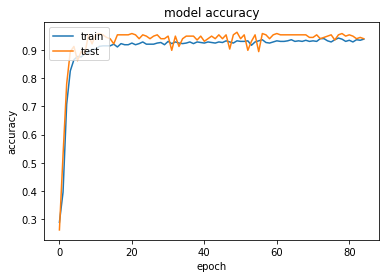

Time Taken for Training 9.777395248413086 Secs


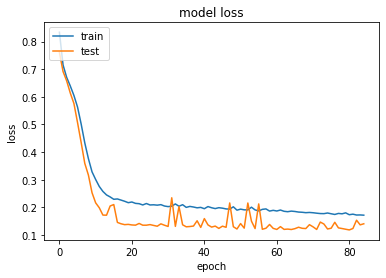

In [15]:
from time import time
start = time()
history=model.fit(x=X_data,y=Y_data,batch_size=14,epochs=85,validation_split=0.30,verbose=1)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Time= time()-start
print("Time Taken for Training "+str(Time)+" Secs")
plt.show()

In [16]:
model.save("C:\\Users\\User\\Desktop\\Estate_model\\perf.h100nadam")